In [9]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import surp
import surp.gce_math as gcem
import arya
import vice

In [37]:
calc_y = np.vectorize(gcem.calc_y)

In [11]:
def load_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the csv summary
    """
    
    file_name = "../models/" + name + "/stars.csv"
    model =  pd.read_csv(file_name, index_col=0)
    yield_params = surp.YieldParams.from_file("../models/" + name + "/yield_params.json")
    surp.set_yields(yield_params)
    return model

In [59]:
def sz_model(dt=0.01, t_end=13.2, tau_sfh=14,  eta=0.5, tau_star=2.5, mode="sfr", RIa="plaw", sfh=None):       
    if sfh is None:
        sfh = sfh_insideout(tau_sfh=tau_sfh)
        
    sz = vice.singlezone(elements=["o", "mg", "c", "fe", "n"], func=sfh, mode=mode, dt=dt, 
                         eta=eta,  
                         tau_star=tau_star,
                         Mg0=1) # total gas mass should not actually matter??
    
    sz.RIa = RIa
    out = sz.run(np.arange(0, t_end, dt), capture=True, overwrite=True)
    return out

In [12]:
def plot_data(x="MG_H", y="C_MG", **kwargs):
    data_kwargs = dict(
        color="k", 
        stat="median",
    )
    kwargs = dict(numbins=20, **kwargs)

    
    df = surp.plots.filter_high_alpha(surp.subgiants)
    arya.medianplot(df, x=x, y=y, zorder=-2, **data_kwargs, **kwargs)

In [115]:
def plot_model(model, x="MG_H_true", y="C_MG_true", **kwargs,):
    model_kwargs = dict(
        stat="median", errorbar=None,
        aes="line", numbins=20
    )
    df = surp.plots.filter_high_alpha(model)

    arya.medianplot(df, x=x, y=y, label="model", **model_kwargs, **kwargs)

    
def plot_model_caafe(model, x="MG_FE_true", y="C_MG_true", **kwargs,):

    plt.scatter(model[x], model[y], label="model", s=1, c=model["MG_H"])


In [116]:
calc_y = np.vectorize(gcem.calc_y)

In [117]:
def plot_eq_caah(**kwargs):
    M_H = np.linspace(-0.45, 0.45, 1000)
    Zs = gcem.MH_to_Z(M_H)
    ys = calc_y(Zs)
    ymg = calc_y(Zs, "mg")

    co = gcem.abund_to_brak(ys / ymg, "C", "MG")
    oh = gcem.abund_to_brak(ymg, "C", "MG")
    
    plt.plot(M_H, co, label="equilibrium", color="k", lw=2, **kwargs)
    
    
def plot_eq_caafe(**kwargs):
    M_H = np.linspace(-0.45, 0.45, 1000)
    Zs = gcem.MH_to_Z(M_H)
    yc = calc_y(Zs)
    ymg = calc_y(Zs, "mg")
    yfe = calc_y(Zs, "fe")

    co = gcem.abund_to_brak(yc / ymg, "C", "MG")
    ofe = gcem.abund_to_brak(ymg/yfe, "mg", "fe")
    
    plt.plot(ofe, co, label="equilibrium", **kwargs)
    
def sz_caafe(**kwargs):
    sz = sz_model()
    plt.plot(sz.history["[o/fe]"], sz.history["[c/o]"], color=arya.COLORS[0], lw=2, **kwargs)

In [118]:
def sfh_insideout(tau_rise=2, tau_sfh=15):
    return lambda t: np.exp(-t/tau_sfh) * (1 - np.exp(-t/tau_rise))

In [119]:
def compare_caah(name):
    model = load_model(name)

    plot_data()
    plot_model(model)
    plot_eq_caah()
    
    plt.xlabel("[Mg/H]")
    plt.ylabel("[C/Mg]")

In [120]:
def compare_caafe(name, **kwargs):
    model = load_model(name)
    plot_model_caafe(model)
    plot_eq_caafe(**kwargs)
    sz_caafe(label="singlezone")
    
    plt.xlabel("[Mg/Fe]")
    plt.ylabel("[C/Mg]")

In [121]:
def compare(name):
    fig, axs = plt.subplots(1, 2, figsize=(8, 3), )
    fig.title(name)
    plt.sca(axs[0])
    compare_caah(name)
    
    plt.sca(axs[1])
    compare_caafe(name)
    

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with thi

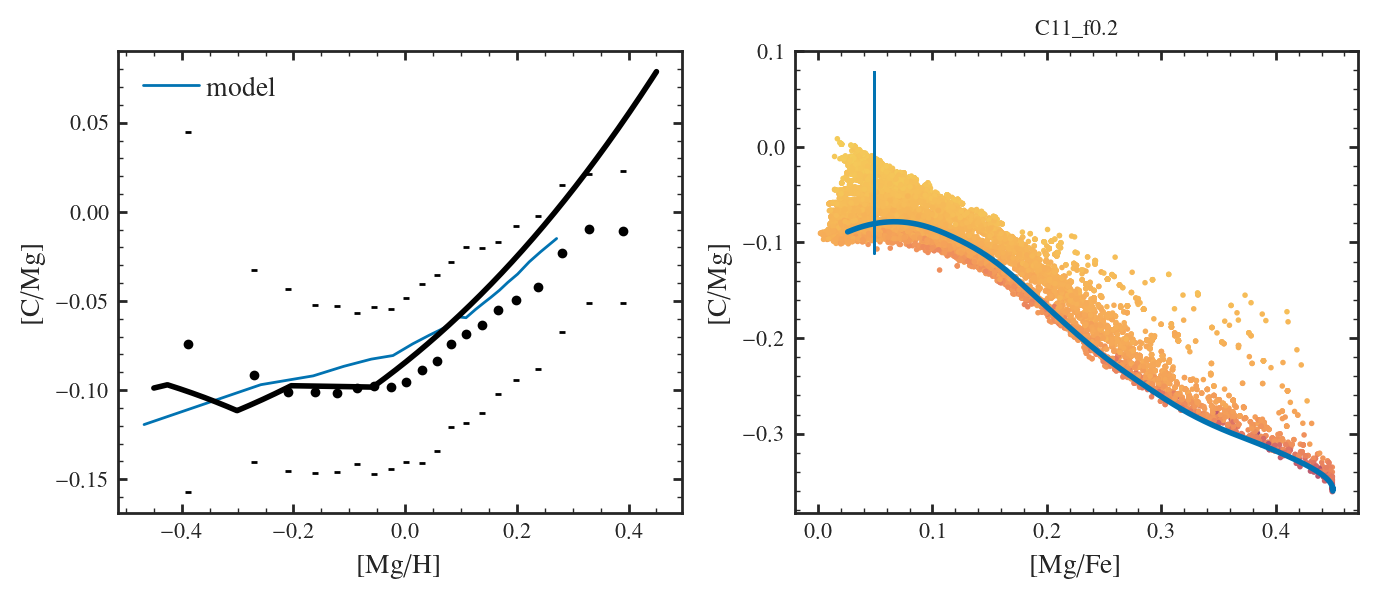

In [122]:
compare("C11_f0.2")

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with thi

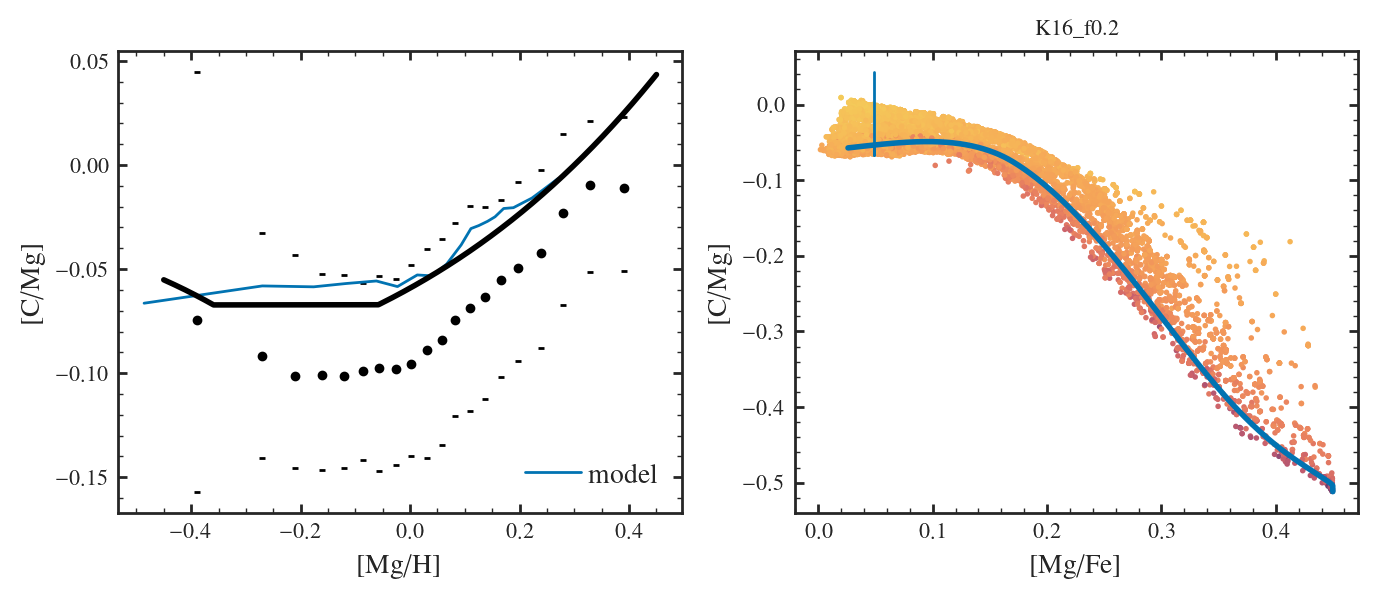

In [123]:
compare("K16_f0.2")

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with thi

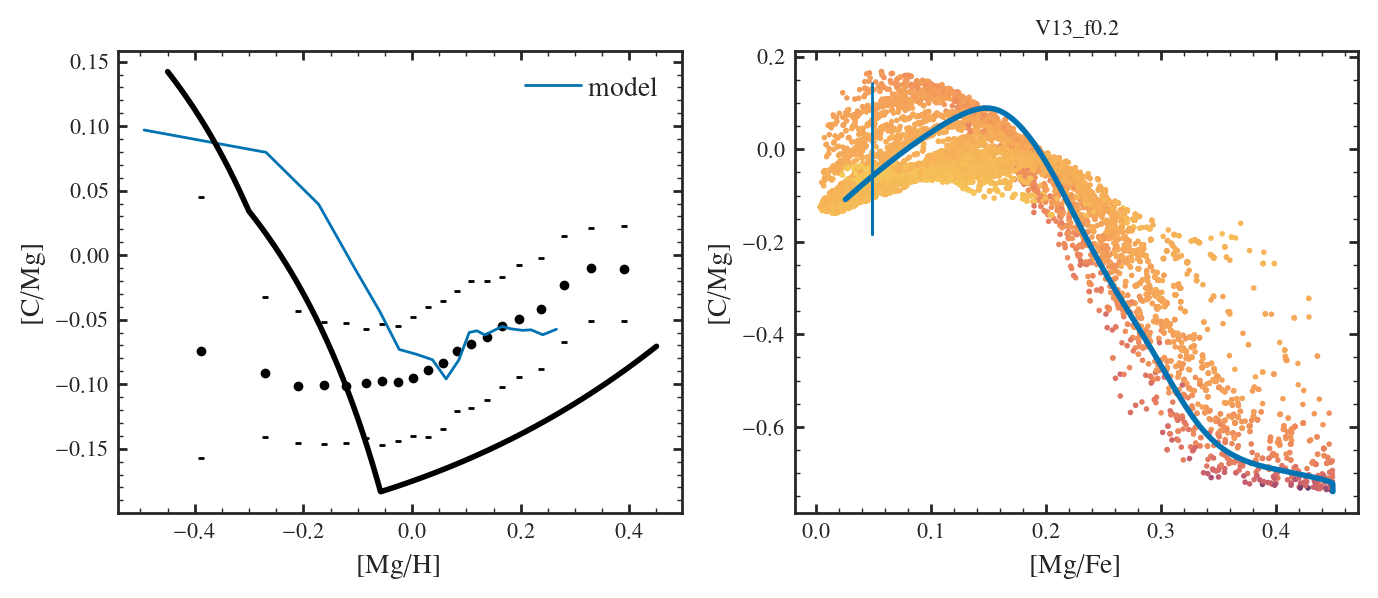

In [124]:
compare("V13_f0.2")

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with thi

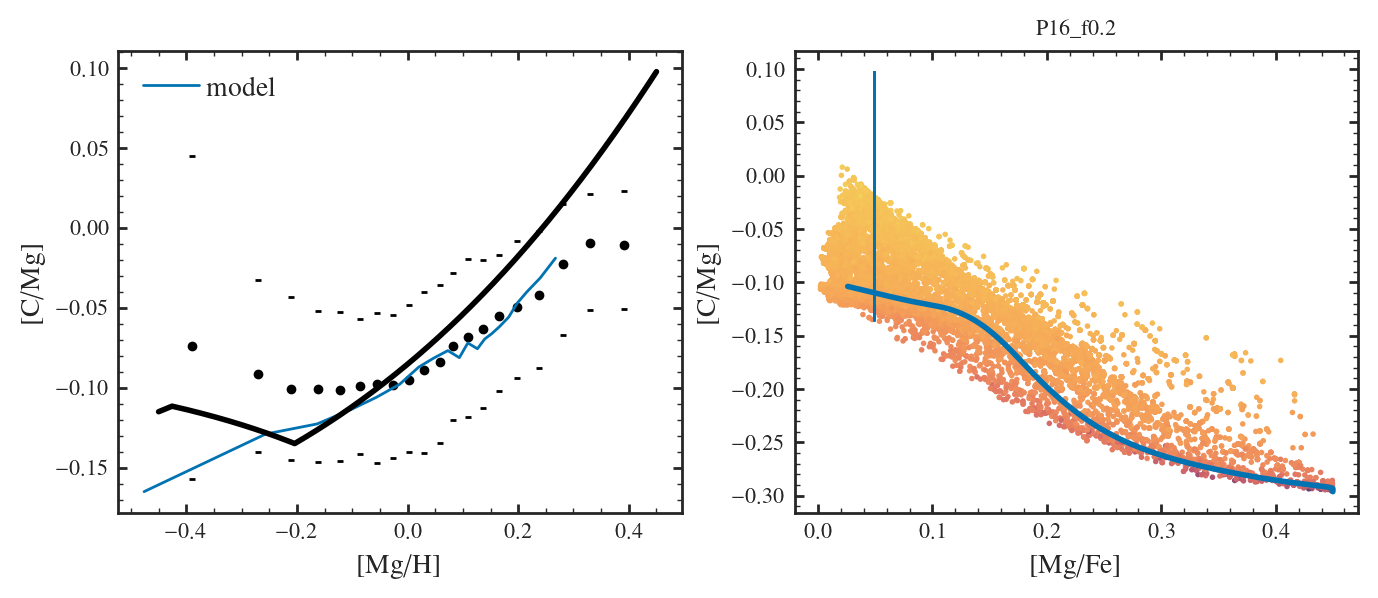

In [125]:
compare("P16_f0.2")

In [93]:
def plot_ssp_mgh(Z, **kwargs):
    m_c, times = vice.single_stellar_population("c", Z=Z, mstar=1)
    m_mg, times = vice.single_stellar_population("mg", Z=Z, mstar=1)

    c_mg = gcem.abund_to_brak(np.array(m_c)/m_mg, "C", "MG")
    fe_mg = gcem.abund_to_brak(np.array(m_mg), "Fe", "MG")
    plt.plot(mg_h, c_mg, **kwargs)


In [94]:
def plot_ssp_femg(Z, **kwargs):
    m_c, times = vice.single_stellar_population("c", Z=Z, mstar=1)
    m_mg, times = vice.single_stellar_population("mg", Z=Z, mstar=1)
    m_fe, times = vice.single_stellar_population("fe", Z=Z, mstar=1)

    c_mg = gcem.abund_to_brak(np.array(m_c)/m_mg, "C", "MG")
    mg_fe = gcem.abund_to_brak(np.array(m_mg)/m_fe, "MG", "FE")
    plt.plot(mg_fe, c_mg, **kwargs)


In [96]:
fiducial = surp.ViceModel.from_saved("../models/C11_f0.2/model.json")

Text(0.5, 1.0, 'Binned APOGEE trends')

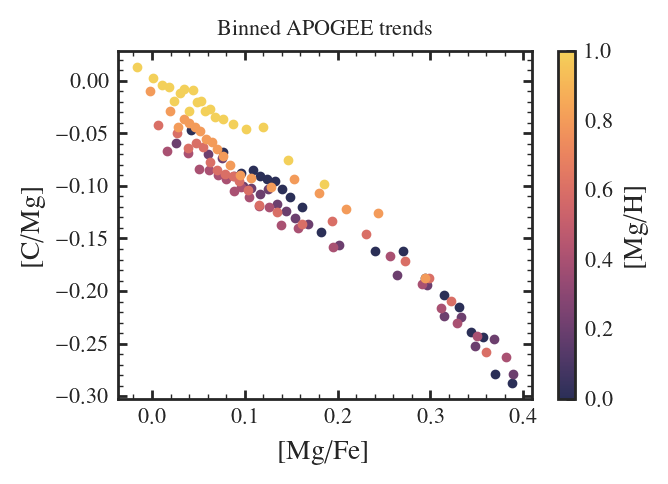

In [97]:
hm = arya.figure.colorbar.HueMap((-0.3, 0.3))

for c in np.linspace(-0.3, 0.3, 6):
    df = surp.plots.filter_metallicity(surp.subgiants,w=0.05,c=c)
    arya.medianplot(df, "MG_FE", "C_MG", numbins=20, color=hm(c), errorbar=None)

plt.colorbar(label="[Mg/H]")
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.title("Binned APOGEE trends")

/tmp/slurmtmp.27759093/ipykernel_128703/1533341937.py:6: RuntimeWarning: invalid value encountered in divide
  c_mg = gcem.abund_to_brak(np.array(m_c)/m_mg, "C", "MG")
/tmp/slurmtmp.27759093/ipykernel_128703/1533341937.py:7: RuntimeWarning: invalid value encountered in divide
  mg_fe = gcem.abund_to_brak(np.array(m_mg)/m_fe, "MG", "FE")
/tmp/slurmtmp.27759093/ipykernel_128703/3185913641.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin' will be ignored
  plt.scatter(fiducial.stars.MG_FE, fiducial.stars.C_MG, s=0.1, alpha=1, vmin=-0.5)


Text(0, 0.5, '[C/Mg]')

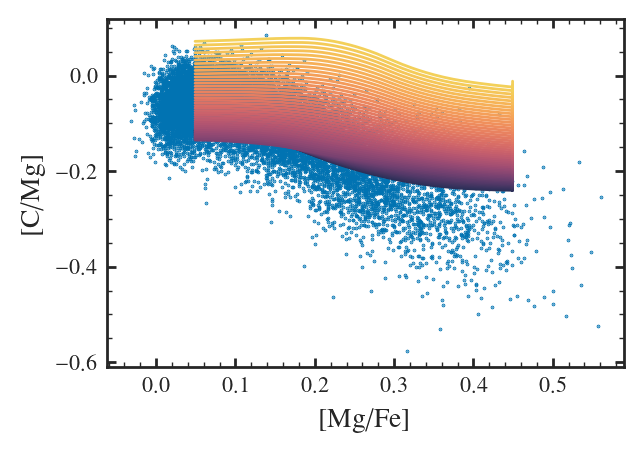

In [102]:
hm = arya.figure.colorbar.HueMap((-0.4, 0.4))

for MH in np.linspace(-0.4, 0.4):
    plot_ssp_femg(Z=gcem.MH_to_Z(MH), c=hm(MH))

plt.scatter(fiducial.stars.MG_FE, fiducial.stars.C_MG, s=0.1, alpha=1, vmin=-0.5)
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

## Properties of solar stars

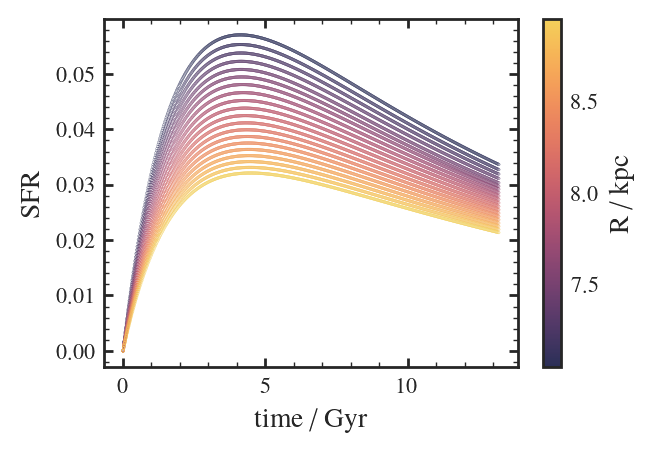

In [99]:
filt = fiducial.history.R > 7
filt &= fiducial.history.R < 9
h = fiducial.history[filt]
plt.scatter(h.time, h.sfr, s=0.01, alpha=1, c=h.R)
plt.xlabel("time / Gyr")
plt.ylabel(r"SFR")
plt.colorbar(label="R / kpc")

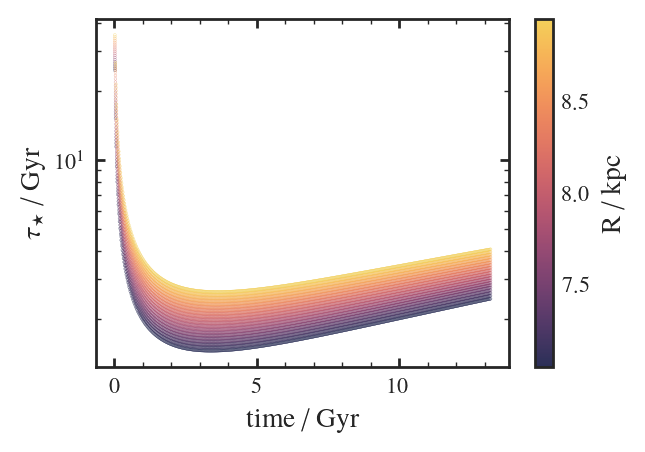

In [100]:
filt = fiducial.history.R > 7
filt &= fiducial.history.R < 9
h = fiducial.history[filt]
plt.scatter(h.time, 1/(h.sfr/ h.mgas * 1e9), s=0.01, alpha=1, c=h.R)
plt.yscale("log")
plt.xlabel("time / Gyr")
plt.ylabel(r"$\tau_\star$ / Gyr")
plt.colorbar(label="R / kpc")